<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/ARIMA_SARIMAX_Insumo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES IMPORT, SKTIME AND STATSMODELS INSTALLING AND DATASET IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 34.2 MB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 34.5 MB 10 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

In [ ]:
#Dataset import
from google.colab import files
uploaded = files.upload()

Saving Insumo 9 - FH 3h.xlsx to Insumo 9 - FH 3h.xlsx


BASICS OF THE TIME SERIES

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 9 - FH 3h.xlsx']))
df

,Data,Nível Insumo 9 (%)
0,2020-01-01 00:00:00,59.736069
1,2020-01-01 03:00:00,51.016441
2,2020-01-01 06:00:00,42.485916
3,2020-01-01 09:00:00,42.107887
4,2020-01-01 12:00:00,37.09317
...,...,...
7051,2022-05-31 09:00:00,51.659706
7052,2022-05-31 12:00:00,51.084957
7053,2022-05-31 15:00:00,48.949753
7054,2022-05-31 18:00:00,45.225914


In [ ]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [ ]:
#Checking if data is the index
df.head()

,Nível Insumo 9 (%)
Data,
2020-01-01 00:00:00,59.736069
2020-01-01 03:00:00,51.016441
2020-01-01 06:00:00,42.485916
2020-01-01 09:00:00,42.107887
2020-01-01 12:00:00,37.09317


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nível Insumo 9 (%)  7056 non-null   object
dtypes: object(1)
memory usage: 110.2+ KB


PRE-PROCESSING

In [ ]:
#Nível Insumo 9 column has non numeric values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 9 (%)
Data,
2020-04-14 15:00:00,Bad
2020-04-14 18:00:00,Bad
2021-03-31 09:00:00,Bad
2021-03-31 12:00:00,Bad


In [ ]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2020-01-01 00:00:00 to 2022-05-31 21:00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 9 (%)  7056 non-null   float64
dtypes: float64(1)
memory usage: 110.2 KB


Text(0.5, 1.0, 'Insumo 9')

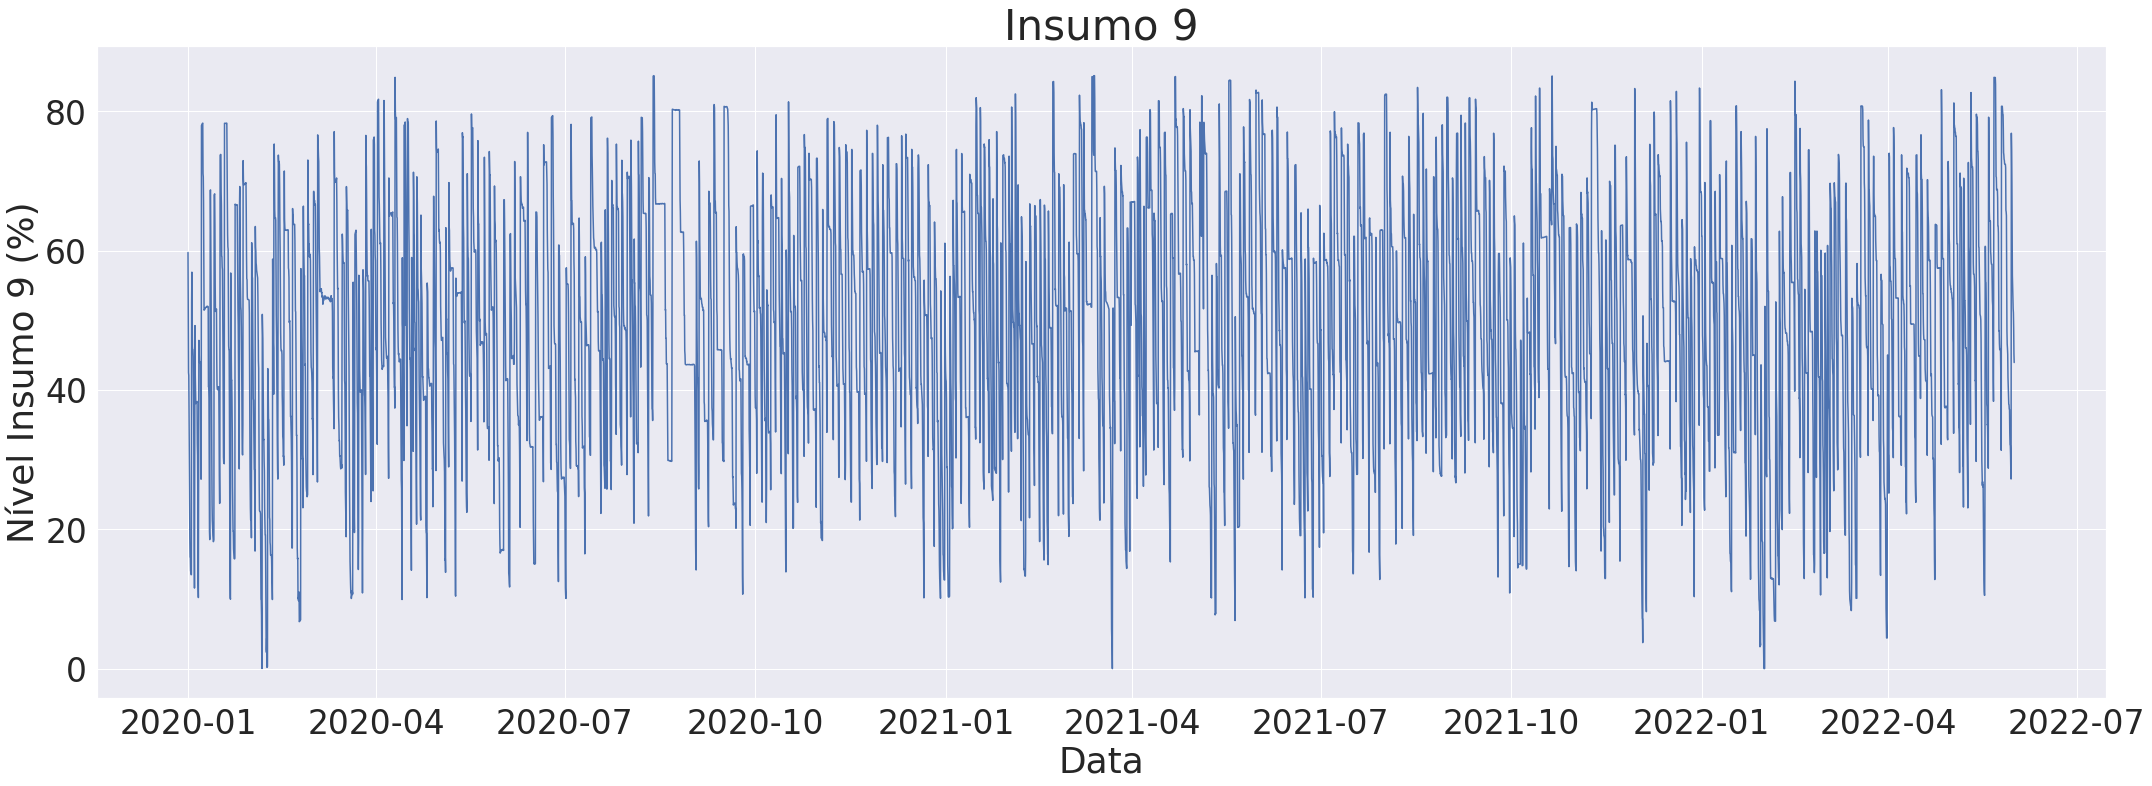

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.lineplot(x='Data', 
                y='Nível Insumo 9 (%)', 
                data=df)
plt.title("Insumo 9", fontsize=42)

Text(0.5, 1.0, 'Insumo 9')

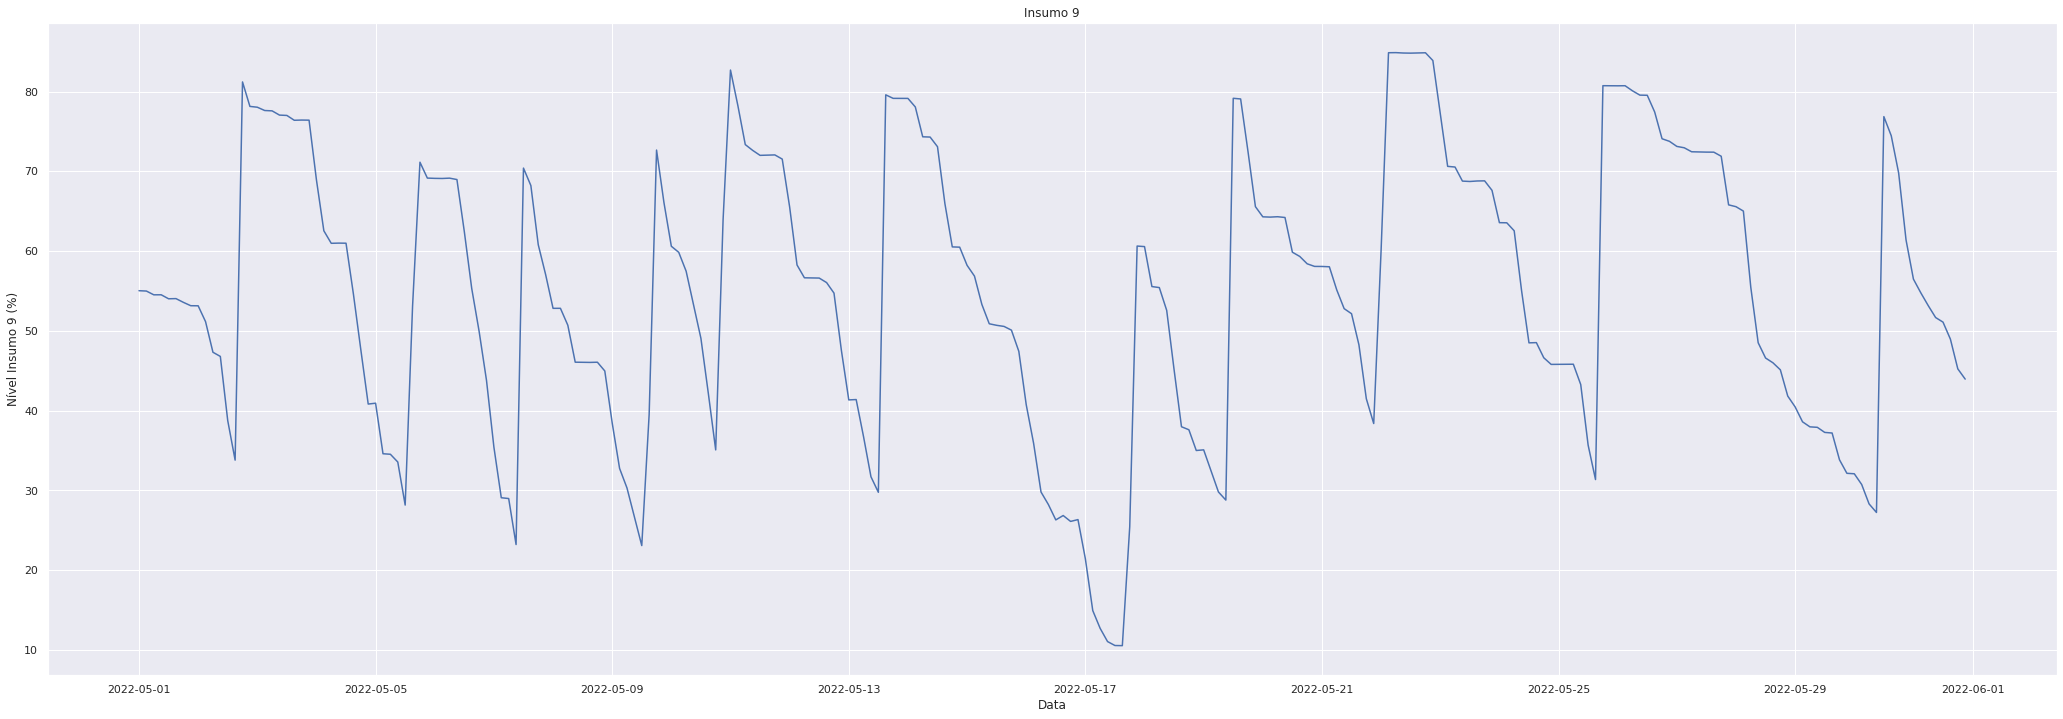

In [ ]:
df_zoom = df.loc[(df.index >= "2022-05-01 00:00") & (df.index <= "2022-05-31 21:00")]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=1)
sns.lineplot(x='Data', 
                y='Nível Insumo 9 (%)', 
                data=df_zoom)
plt.title("Insumo 9", fontsize=12)

ARIMA

In [ ]:
#First we need to ensure DF frequency is D
df_zoom = df_zoom.resample('3H').mean() 

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [ ]:
y_train, y_test = temporal_train_test_split(df, test_size=2000)
# we will try to forecast y_test from y_train

In [ ]:
y_train


,Nível Insumo 9 (%)
Data,
2020-01-01 00:00:00,59.736069
2020-01-01 03:00:00,51.016441
2020-01-01 06:00:00,42.485916
2020-01-01 09:00:00,42.107887
2020-01-01 12:00:00,37.093170
...,...
2021-09-23 09:00:00,44.407917
2021-09-23 12:00:00,42.826057
2021-09-23 15:00:00,39.535374


In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2021-09-24 00:00:00', '2021-09-24 03:00:00',
               '2021-09-24 06:00:00', '2021-09-24 09:00:00',
               '2021-09-24 12:00:00', '2021-09-24 15:00:00',
               '2021-09-24 18:00:00', '2021-09-24 21:00:00',
               '2021-09-25 00:00:00', '2021-09-25 03:00:00',
               ...
               '2022-05-30 18:00:00', '2022-05-30 21:00:00',
               '2022-05-31 00:00:00', '2022-05-31 03:00:00',
               '2022-05-31 06:00:00', '2022-05-31 09:00:00',
               '2022-05-31 12:00:00', '2022-05-31 15:00:00',
               '2022-05-31 18:00:00', '2022-05-31 21:00:00'],
              dtype='datetime64[ns]', name='Data', length=2000, freq='3H', is_relative=False)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:611: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:81: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc712e57e10>)

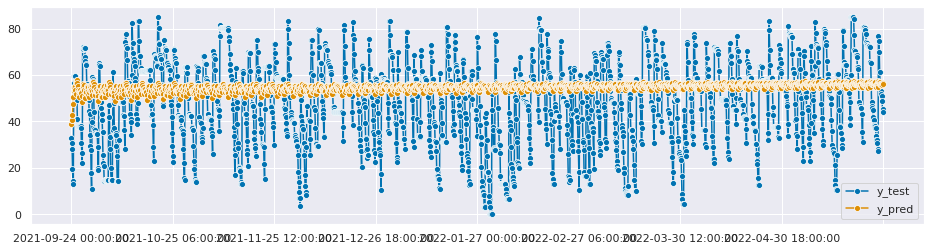

In [ ]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(1, 0, 25), seasonal_order=(1, 1, 0, 20), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])

In [ ]:
# Importing the function
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

25.835021780277167

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Diff Insumo 9')

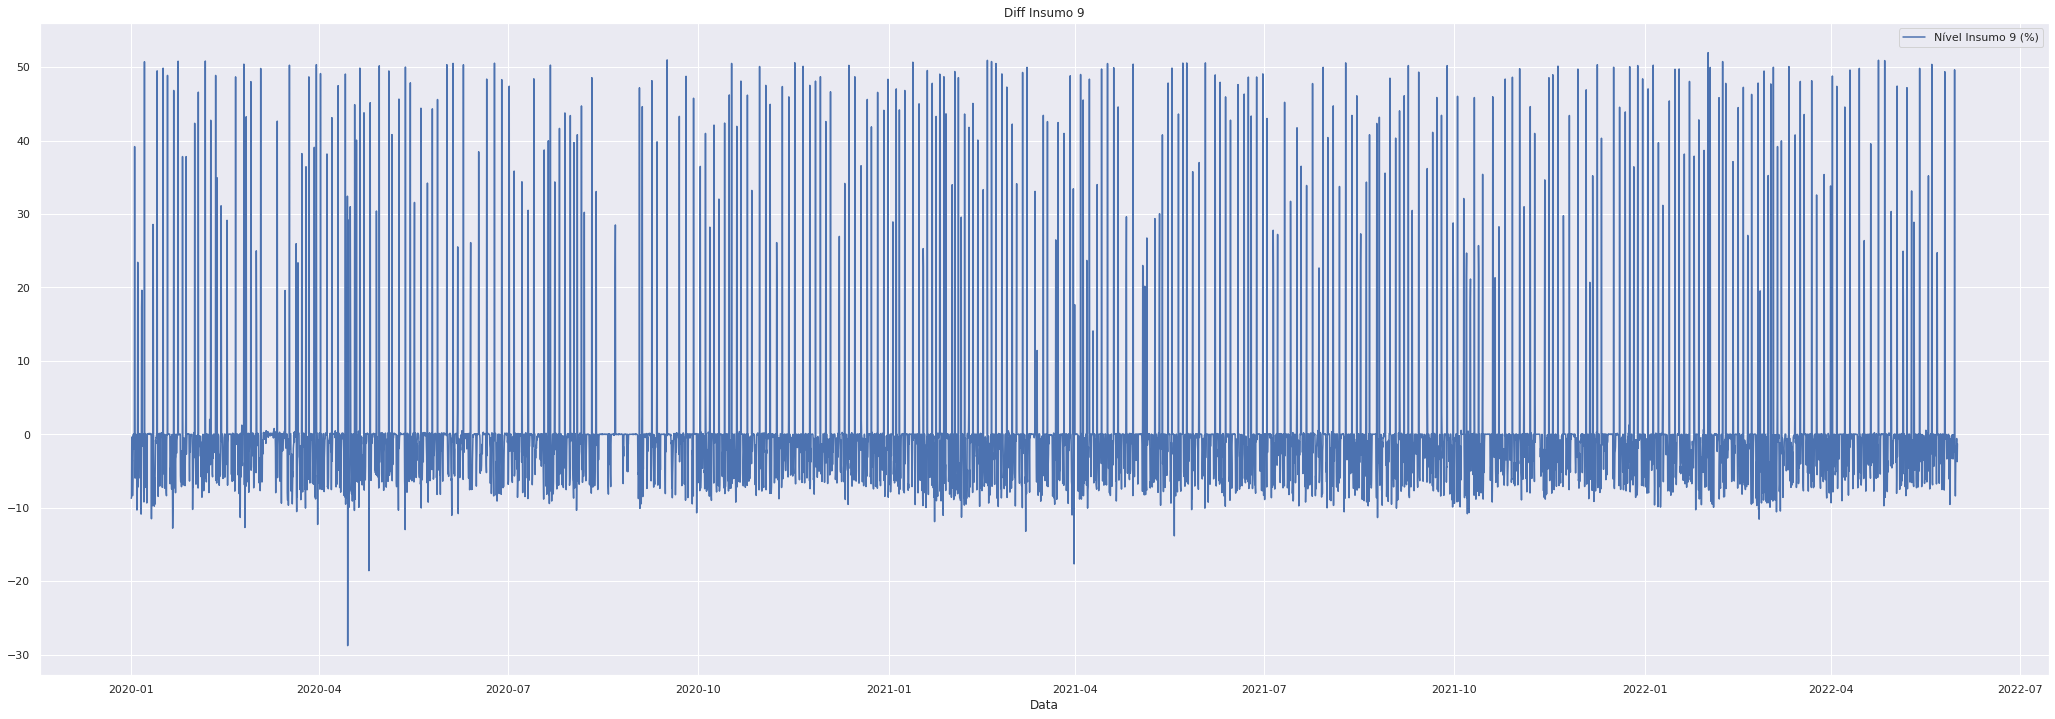

In [ ]:
from pandas import datetime

# Change seaborn plot size
fig.set_size_inches(36, 12)
 
diff = df.diff()

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=1)
sns.lineplot(data=diff)
plt.title("Diff Insumo 9", fontsize=12)


In [ ]:
diff

,Nível Insumo 9 (%)
Data,
2020-01-01 00:00:00,NaN
2020-01-01 03:00:00,-8.719627
2020-01-01 06:00:00,-8.530525
2020-01-01 09:00:00,-0.378029
2020-01-01 12:00:00,-5.014717
...,...
2022-05-31 09:00:00,-1.496319
2022-05-31 12:00:00,-0.574749
2022-05-31 15:00:00,-2.135204


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  Returns


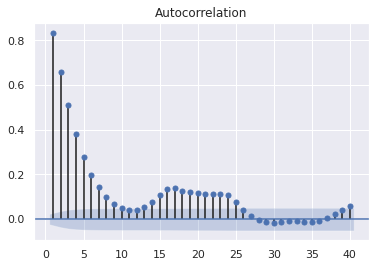

In [ ]:
sm.tsa.acf(df)
fig = tsaplots.plot_acf(df, lags=40, zero=False)
plt.show()

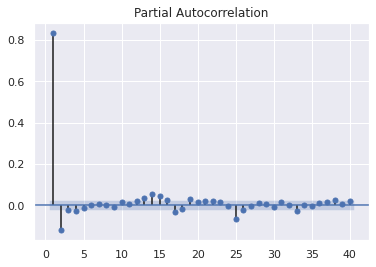

In [ ]:
sm.tsa.pacf(df)
fig = tsaplots.plot_pacf(df, lags=40, zero=False)
plt.show()